1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt


x1=np.random.normal(0,1,1000)
x2=x1+np.random.normal(0,3,1000)
x3=2*x1+x2

df=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
df

,x1,x2,x3
0,0.109518,2.962957,3.181993
1,0.535170,-2.086689,-1.016349
2,0.022797,-1.883714,-1.838120
3,0.867822,-1.482696,0.252947
4,-0.225517,-0.392021,-0.843054
...,...,...,...
995,-1.702693,-4.634853,-8.040239
996,0.064554,0.612358,0.741467
997,-0.904545,1.066070,-0.743019
998,-0.969329,-2.073132,-4.011790


In [2]:
cov=np.cov(df,rowvar=False)
e_val,e_vec=la.eig(cov) 

U,spectrum,Vt=la.svd(cov)
eigenvalues_svd = spectrum**2/(1000-1)
eigenvectors_svd = Vt.T

np.set_printoptions(suppress=True)
print(f'The eigenvectors of the covariance matrix are {e_vec} and its eigenvalues are {e_val}')
print(f'The eigenvectors of the covariance matrix with the SVD method are {eigenvectors_svd} and its eigenvalues are {eigenvalues_svd}')

explained_variance_ratio = eigenvalues_svd/np.sum(eigenvalues_svd)*100
print(explained_variance_ratio)
reduced_data=df.loc[:,explained_variance_ratio>=99.]
reduced_data

The eigenvectors of the covariance matrix are [[-0.1116277  -0.81649658  0.56645617]
 [-0.58213659 -0.40824829 -0.70317162]
 [-0.80539198  0.40824829  0.42974072]] and its eigenvalues are [24.86456384+0.j  0.        +0.j  2.1173718 +0.j]
The eigenvectors of the covariance matrix with the SVD method are [[-0.1116277   0.56645617  0.81649658]
 [-0.58213659 -0.70317162  0.40824829]
 [-0.80539198  0.42974072 -0.40824829]] and its eigenvalues are [0.6188654  0.00448775 0.        ]
[99.28006282  0.71993718  0.        ]


,x1
0,0.109518
1,0.535170
2,0.022797
3,0.867822
4,-0.225517
...,...
995,-1.702693
996,0.064554
997,-0.904545
998,-0.969329


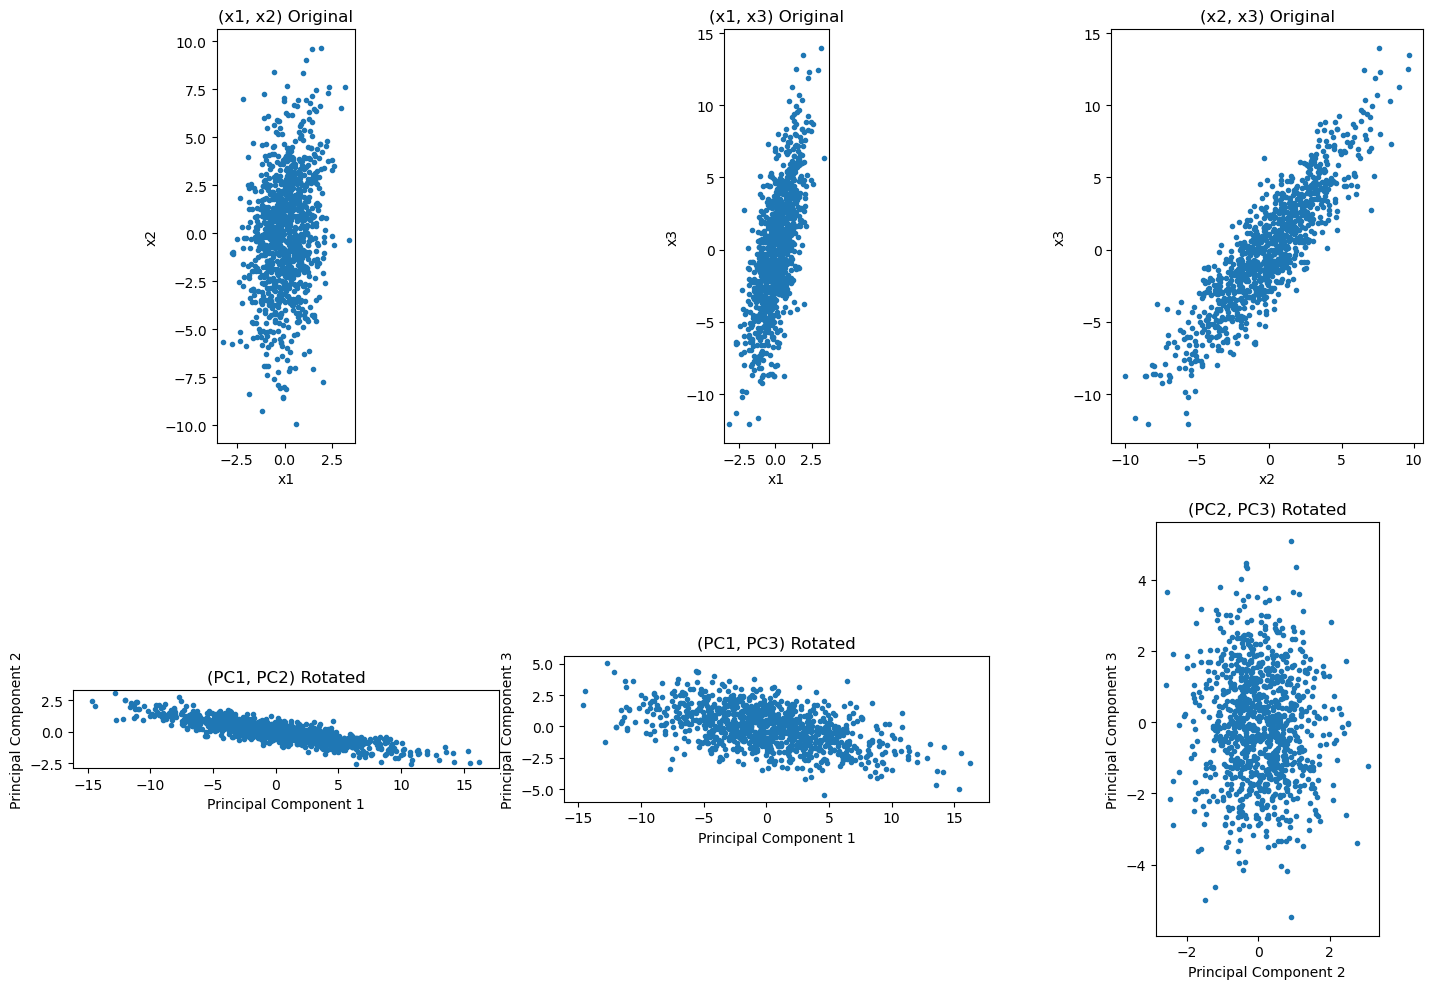

In [3]:
eig_norm=eigenvectors_svd/la.norm(eigenvectors_svd,axis=0)
df_rot=np.dot(df,eig_norm.T)
df_rot

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot (x1, x2) in coordinate originali
axs[0, 0].scatter(df['x1'], df['x2'],marker='.')
axs[0, 0].set_title('(x1, x2) Original')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')


# Plot (x1, x3) in coordinate originali
axs[0, 1].scatter(df['x1'], df['x3'],marker='.')
axs[0, 1].set_title('(x1, x3) Original')
axs[0, 1].set_xlabel('x1')
axs[0, 1].set_ylabel('x3')

# Plot (x2, x3) in coordinate originali
axs[0, 2].scatter(df['x2'], df['x3'],marker='.')
axs[0, 2].set_title('(x2, x3) Original')
axs[0, 2].set_xlabel('x2')
axs[0, 2].set_ylabel('x3')

# Plot (PC1, PC2) dopo la rotazione
axs[1, 0].scatter(df_rot[:, 0], df_rot[:, 1],marker='.')
axs[1, 0].set_title('(PC1, PC2) Rotated')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')

# Plot (PC1, PC3) dopo la rotazione
axs[1, 1].scatter(df_rot[:, 0], df_rot[:, 2],marker='.')
axs[1, 1].set_title('(PC1, PC3) Rotated')
axs[1, 1].set_xlabel('Principal Component 1')
axs[1, 1].set_ylabel('Principal Component 3')

# Plot (PC2, PC3) dopo la rotazione
axs[1, 2].scatter(df_rot[:, 1], df_rot[:, 2],marker='.')
axs[1, 2].set_title('(PC2, PC3) Rotated')
axs[1, 2].set_xlabel('Principal Component 2')
axs[1, 2].set_ylabel('Principal Component 3')
for i in range(2):
    for j in range(3):
        axs[i, j].set_aspect('equal')
    

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


[[ 1.66666227e-01 -3.83010698e-04  0.00000000e+00]
 [-3.83010698e-04 -1.66666227e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Primary component that matters:[ 0.99999736 -0.00229806  0.        ]

[8.35841791 0.24339466 0.        ]


C:\Users\utente\AppData\Local\Temp\ipykernel_4204\3087459642.py:43: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x','y',data=data,linewidth=0.4)


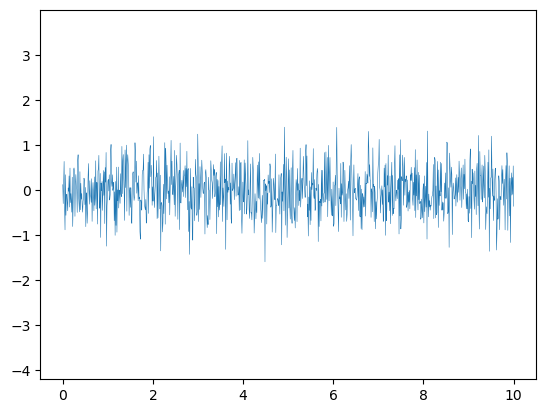

,x,y,z
0,0.00000,0.117803,0.0
1,0.01001,-0.301998,0.0
2,0.02002,0.184929,0.0
3,0.03003,0.634204,0.0
4,0.04004,-0.389730,0.0
...,...,...,...
995,9.95996,-0.114528,0.0
996,9.96997,0.278566,0.0
997,9.97998,-0.095172,0.0
998,9.98999,0.535091,0.0


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import linalg as la

num_samples = 1000
x_data = np.linspace(0, 10, num_samples)

noise = np.random.normal(0, 0.5, num_samples) 
data=pd.DataFrame({'x':x_data,'y':noise,'z':np.zeros(num_samples)})

phis = np.linspace(0, np.pi, 6)
thetas = np.linspace(0, 2*np.pi, 6)
def R(phi,theta):
    return np.array([[np.cos(theta),np.sin(theta),0],[-np.sin(theta),np.cos(theta),0],[0,0,1]])

rotated_datasets = []
for phi in phis:
    for theta in thetas:
        rotated_data = np.dot(data, R(phi,theta))
        rotated_datasets.append(rotated_data)

pca_results_rot = []
pca_results=[]
for dataset in rotated_datasets:
    pca = PCA()
    pca.fit(dataset)
    pca_results.append(pca.components_)
    
for res in pca_results_rot:
    for phi in phis:
        for theta in thetas:
            pca_result=np.dot(res,la.inv(R(phi,theta)))
            pca_results.append(pca_result)

princ_components=np.mean(pca_results,axis=0)
eig_val=pca.explained_variance_
print(princ_components)

print(f'Primary component that matters:{princ_components[0]/la.norm(princ_components[0])}\n')
print(eig_val)
plt.plot('x','y',data=data,linewidth=0.4)
plt.axis('equal')
plt.show()
data

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 